# Machine learning - Assignment 1 - Data preprocessing and manual introspection
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

### Introduction

In this assignment, we were tasked with performing simple linear regression on different variables in the Boston housing market dataset. We would then extrapolate this linear regression method on several variables and in the end combine all of the variables in the same linear regression model. Conclusions and interpretations of the outputs will also be made in this notebook to make it clearer as to how and why certain calculations are computed and what their results indicate.

### Load the data and get an overview of the data

Like in the last assignment, we need to import all of our libraries, load the dataset and call some functions/commands in order to get an overview of the data. At this stage, a lot of code was reused from my A1 submission so thats why some commments and lines of code will look similar.

In [2]:
import pandas as pd # Never coded in R before but this seems to be the equivalent of library(pandas) in R
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# load boston.csv
boston = pd.read_csv('Boston.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

Once the dataset is loaded, we can display the number of predictors (variables/columns) and their names.

In [3]:
# This will print '15' and not '14' because it counts the first 'empty' column
numFeatures = boston.shape[1]
print(numFeatures)

featureNames = boston.columns.tolist()
print(featureNames, end="\n\n")


15
['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']



We can now print a statistic summary of the whole dataset, using the 'describe' function which is similar to 'summary' in R.

In [4]:
print(boston.describe(), end="\n\n")


       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

We can now also print all of the datapoints in this dataset.

In [5]:
print("total amount of datapoints: ", boston.shape[0], end="\n\n")

total amount of datapoints:  506



At this stage, we have quite a good idea at how the data looks like. I did also find a good [source](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) online that explains the dataset in further detail. The most important part for me was just to get an idea of what the columns actually mean which is important for the interpretation later.

However, now when we have a good overview, we can now plot some predictors against some response values using linear regression. For this, i decided to use the same variables as the example, which was lstat, rm and age.

At this stage i will plot the scatter plots with a linear regression line, confidence interval and correlation coefficient.

Correlation coefficient between medv and lstat:  -0.7376627261740147 , with p-value:  5.081103394387547e-88
Correlation coefficient between medv and rm:  0.6953599470715394 , with p-value:  2.4872288710071593e-74
Correlation coefficient between medv and age:  -0.37695456500459623 , with p-value:  1.5699822091877261e-18



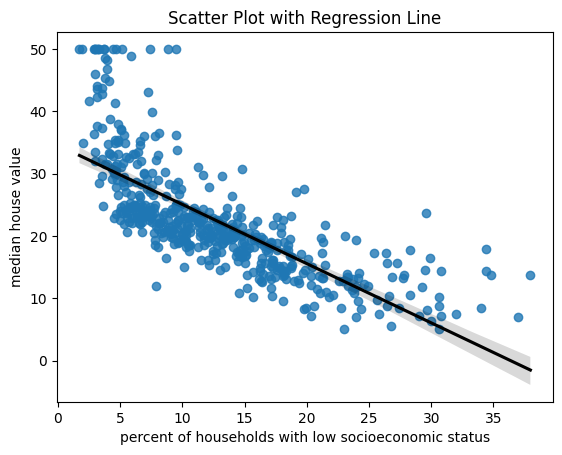

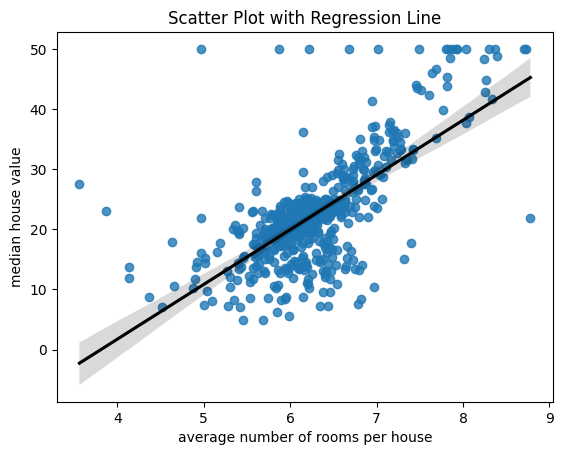

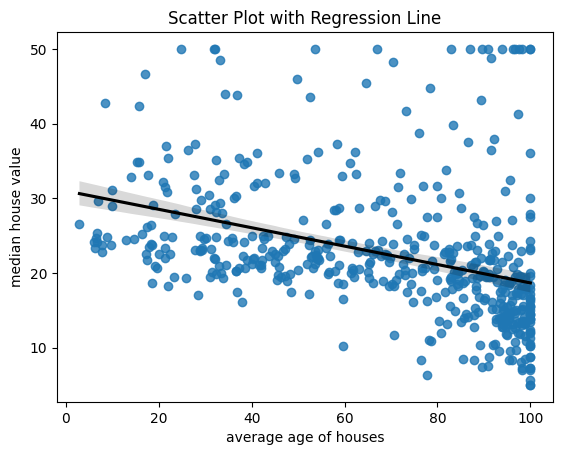

In [6]:

# correlation coefficients between our variables for the 3 plots
corCoef_medv_lstat, pValue_medv_lstat = stats.pearsonr(boston['medv'], boston['lstat'])
print("Correlation coefficient between medv and lstat: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_lstat)

corCoef_medv_lstat, pValue_medv_rm = stats.pearsonr(boston['medv'], boston['rm'])
print("Correlation coefficient between medv and rm: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_rm)

corCoef_medv_lstat, pValue_medv_age = stats.pearsonr(boston['medv'], boston['age'])
print("Correlation coefficient between medv and age: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_age, end="\n\n")

# Scatter plot with regression line between lstat and medv
sns.regplot(x=boston['lstat'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("percent of households with low socioeconomic status")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show() # Remember to make the window bigger to see the plot

# Scatter plot with regression line between rm and medv
sns.regplot(x=boston['rm'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average number of rooms per house")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()

# Scatter plot with regression line between age and medv
sns.regplot(x=boston['age'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average age of houses")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()


### Perform simple linear regressions

Now when we have a good overview of the data, and also plotted some regression plots with correlation coefficients. We can not go ahead and fit theese simple linear regression models with medv as the response value with some other variables. I will keep using the lstat, rm and age variables as predictors.

I can fit the models using the statsmodels.OLS package and from that print the statistical summary. However, the built in summary doesent include the residuals so i used the .resid function from the same package in order to print the residuals to make it as similar as possible to the example.

In [7]:

model_lstat_medv = sm.OLS(boston['medv'], sm.add_constant(boston['lstat'])).fit()
residuals_model_lstat_medv = model_lstat_medv.resid

print("Residuals: ", residuals_model_lstat_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_lstat_medv.summary())



model_rm_medv = sm.OLS(boston['medv'], sm.add_constant(boston['rm'])).fit()
residuals_model_rm_medv = model_rm_medv.resid

print("Residuals: ", residuals_model_rm_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_rm_medv.summary())



model_age_medv = sm.OLS(boston['medv'], sm.add_constant(boston['age'])).fit()
residuals_model_age_medv = model_age_medv.resid

print("Residuals: ", residuals_model_age_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_age_medv.summary())


Residuals:  count    5.060000e+02
mean     3.521821e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        11:01:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
      

### Interpretation of results

Lets first try to understand what is actually being calculated at this stage and explain some of the terminologies, this is where the [source](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) i cited earlier will be very helpfull.

A _response variable_, in this case **medv**, is the dependent variable in the regression mode and it represents the outcome that we are trying to predict or explain using our desired model. In this case, **medv** means, the median house value in 1000's of dollars.

A _predictor variable_, in this case **lstat (percentege of households with low socioeconomic status)**, **rm (average number of rooms per house)** and **age (Proportion of owner occupied units built before 1940)**, are independent variables used to predict the response. In this analysis, i am essentially trying to understand how each predictor variable individually influences **medv**.

From the data that was gathered, i will create my own summary that extracts the key findings from the experiment. I have ranked theese based on the highest R-squared values.

| Variables    | R^2   | Coefficient | P-value   |
|--------------|-------|-------------|-----------|
| medv ~ lstat | 0.544 | -0.950      | P < 0.001 |
| medv ~ rm    | 0.484 | 9.102       | P < 0.001 |
| medv ~ age   | 0.142 | -0.123      | P < 0.001 |

So, as we can see, **lstat** explains 54.4% of the variability in medv. We can also conclude from the coefficient that for each 0.95% increase in the percentage of low socioeconomic households, the median house value decreases by approximately $950.

**rm** explains 48.4% of the variability in medv. From the coefficient we can see that for each additional room in the house, the median house value increases by about $9102.

**age** explains 14.2% of the variability in medv. From the coefficient we can see that for every 1% increase in the proportion of older houses, the median house value decreases by about 123$.


Because **lstat** has the highest R^2 value, we can conclude that **lstat** has the strongest negative influence on house prices. This is followed by **rm** which has a strong positive influence. **age** also negatively affects house prices but has a much weaker relationship. All of theese relationships have a P-value of P < 0.001 which indicates that all of the predictors are statistically significant to the response variable.

From a practical standpoint, this could indicate that stakeholders that have an interest in housing policies such as governmental bodies, banks and credit unions should prioritize socioeconomic factors and house sizes over the age of homes when estimating or influencing house prices when doing market analysies.

Up next, we now have to obtain a confidence interval for the coefficient estimates for the individual models.

In [9]:

# Confidence intervals for the coefficients from the model with lstat
conf_lstat_medv = model_lstat_medv.conf_int()
conf_lstat_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_lstat_medv.index = ['(Intercept)', 'lstat (slope)']
print("Confidence interval for lstat: ")
print(conf_lstat_medv, end="\n\n")

# Confidence intervals for the coefficients from the model with rm
conf_rm_medv = model_rm_medv.conf_int()
conf_rm_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_rm_medv.index = ['(Intercept)', 'rm (slope)']
print("Confidence interval for rm: ")
print(conf_rm_medv, end="\n\n")

# Confidence intervals for the coefficients from the model with age
conf_age_medv = model_age_medv.conf_int()
conf_age_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_age_medv.index = ['(Intercept)', 'age (slope)']
print("Confidence interval for age: ")
print(conf_age_medv, end="\n\n")

Confidence interval for lstat: 
                    2.5%      97.5%
(Intercept)    33.448457  35.659225
lstat (slope)  -1.026148  -0.873951

Confidence interval for rm: 
                  2.5%      97.5%
(Intercept) -39.876641 -29.464601
rm (slope)    8.278855   9.925363

Confidence interval for age: 
                  2.5%      97.5%
(Intercept)  29.015752  32.941604
age (slope)  -0.149647  -0.096679



A confidence interval provides a range of values for the coefficient estimates where we are 95% confident that the true population parameter lies. If the range doesent include 0, the predictor is statistically significant.

The confidence interval for **lstat** show that we have a range for the intercept of [33.448 - 35.659] which means that if **lstat** would be 0 (meaning we have no low socioeconomic households in a given area), the house value is predicted to be between $33448 and $35659. The slope for lstat falls in the range [-1.026 - -0.874] which means that for every 1% increse in low socioeconomic households in a given neighborhood, the median house value will decrease by $874-$1026

The confidence interval for **rm** show that we have a range for the intercept of [-39.877 - -29.465] which means that if a room would have 0 rooms, the median house value would be negative. This specific piece of information isnt that meaningfull but could reflect extrapolation. The slope, however, is more meaningfull as it falls in the range [8.279 - 9.925] which means that for every additional room, the median house value increases by $8279-$9925 .

The confidence interval for **age** show that we have a range for the intercept of [29.016 - 32.942] which means that if **age** would be 0 (brand new), the median house value would be predicted to be between $29016-$32942. The slope for **age** falls in the range [-0.150 - -0.097] which means that for every 1% increase in the proportion of older houses, the median house value decreases by $97-$150.

All of theese confidence intervals dont include 0 in the ranges so we know that all of them are statistically signifcant.

### Use the simple linear regression models

For the next part of the assignment, we have to predict the medv response values for the selected predictor values. Calculate the prediction intervals for theese values.

In [10]:

# Prediction interval for the model with lstat

new_lstat = pd.DataFrame({'lstat': [5, 10, 15]})  # The three levels

new_lstat_with_const = sm.add_constant(new_lstat)

pred_lstat_medv = model_lstat_medv.get_prediction(new_lstat_with_const)
pred_lstat_medv_summary = pred_lstat_medv.summary_frame(alpha=0.05)
print("Prediction interval for lstat: ")
print(pred_lstat_medv_summary, end="\n\n")

# Prediction interval for the model with rm

new_rm = pd.DataFrame({'rm': [5, 6.5, 8]})  # The three levels

new_rm_with_const = sm.add_constant(new_rm)

pred_rm_medv = model_rm_medv.get_prediction(new_rm_with_const)
pred_rm_medv_summary = pred_rm_medv.summary_frame(alpha=0.05)
print("Prediction interval for rm: ")
print(pred_rm_medv_summary, end="\n\n")

# Prediction interval for the model with age

new_age = pd.DataFrame({'age': [25, 50, 75]})  # The three levels

new_age_with_const = sm.add_constant(new_age)

pred_age_medv = model_age_medv.get_prediction(new_age_with_const)
pred_age_medv_summary = pred_age_medv.summary_frame(alpha=0.05)
print("Prediction interval for age: ")
print(pred_age_medv_summary, end="\n\n")

Prediction interval for lstat: 
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459  

Prediction interval for rm: 
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  10.839924  0.613410       9.634769      12.045079     -2.214474   
1  24.493088  0.307657      23.888639      25.097536     11.480391   
2  38.146251  0.776633      36.620414      39.672088     25.058353   

   obs_ci_upper  
0     23.894322  
1     37.505784  
2     51.234149  

Prediction interval for age: 
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  27.899610  0.699094      26.526112      29.273107     11.090368   
1  24.820542  0.454307      23.927973      25.713110      8.0

A prediction interval provides a range where an individual prediction is expected to fall, taking the uncertainty of the model and variability of data in to account. Prediction intervals will be much wider than confidence intervals because they include variability for individual predictions, not just the mean.

For **lstat** we have predictions of the mean of predicted median house values as follows:

* For lstat = 5, predicted medv is $29,804.
* For lstat = 10, predicted medv is $25,053.
* For lstat = 15, predicted medv is $20,303.

the prediction interval for lstat = 5 can be found if we look at the 'obs_ci_lower' and 'obs_ci_upper' columns of the first row. For lstat = 5, the median house value for an individual house is expected to be between $17,566 and $42,042. Similarily, wider ranges for higher lstat values which means it increases uncertainty. The key takeaway from this is that as the percentage of low socioeconomic houses increase in a neighborhood (lstat value increases), the median house values drop.

For **rm** we have predictions of the mean of predicted median house as follows:

* For rm = 5, predicted medv is $10,840.
* For rm = 6.5, predicted medv is $24,493.
* For rm = 8, predicted medv is $38,146.

Prediction intevals:

* For rm = 5, individual predictions range from $-2,214 to $23,894.
* For rm = 6.5, predictions range from $11,480 to $37,506.
* For rm = 8, predictions range from $25,058 to $51,234.

For **age** we have predictions of the mean of predicted median house as follows:

* For age = 25, predicted medv is $27,900.
* For age = 50, predicted medv is $24,821.
* For age = 75, predicted medv is $21,741.

prediction intervals:

* For age = 25, individual predictions range from $11,090 to $44,709.
* For age = 50, predictions range from $8,044 to $41,597.
* For age = 75, predictions range from $4,971 to $38,512.

### Use the simple linear regression models

Now we fit **medv** as a response with the predictors selected before altogether.

In [11]:
model_multivariate = sm.OLS(boston['medv'], sm.add_constant(boston[['lstat', 'rm', 'age']])).fit()

residuals_model_multivariate = model_multivariate.resid
print("Residuals: ", residuals_model_multivariate.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_multivariate.summary())

Residuals:  count    5.060000e+02
mean     1.685082e-15
std      5.525660e+00
min     -1.820992e+01
25%     -3.467402e+00
50%     -1.053282e+00
75%      1.957443e+00
max      2.750044e+01
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.20e-110
Time:                        12:01:18   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
      

From the residuals we can see that we have a mean residual that is very close to 0 which means that the model predictions on average align well with the observed values.

We have an R^2 value of 0.639 which means that our model that contains all three predictors explain 63.9% of the variability in **medv**. This is an improvement over the individual models that had at most 54.4%. We have a P value P < 0.001 which means that at least one of our predictors is statistically signifcant in explaining medv.

We can also deduce some information from the table containing our predictor variables.

the 'const' has an intercept coefficient of -1.1753 which means that this is the predicted value of **medv** when all predictors are 0. However, because 0 can be an unrealistic number, especially **rm**, this has little to no meaning.

**lstat** has intercept of -0.6685 with p < 0.001 which means that a 1% increase in **lstat** the **medv** will decrease by $668.5.

**rm** (intercept: 5.0191, P < 0.001) shows that for every additional room, the house values increase by $5019, holding all other predictors constant.

**age** (intercept: 0.0091, P = 0.418) the coefficient is small and significantly insignificant which means that age has little to no impact on predicting medv.

Conclusively, we can say that this model, including multiple predictors can improve the models explanatory power (given that R^2 = 0.639) as opposed to using each variable individually as a predictor.

One small detail, which is easy to miss but very important when taking multiple variables as predictors for one response variable, is the condition number. This can be seen as a rating of multicollinearity where everything over 30 can signal that multicollinearity should be investigated. In my case, i have 985 which is extremely high. Multicollinearity is when predictors are strongly correlated with each other, this can make it so that the model struggles to determine which predictor is responsible for output variations in the response variable which can lead to higher errors and unstable estimates.

### Perform multiple linear regressions

For this part we have to predict the medv response values for all of the predictors, meaning all of the variables in the dataset. Calculate the prediction intervals for these values.

In [12]:
model_all = sm.OLS(boston['medv'], sm.add_constant(boston.drop(columns=['medv']))).fit() # we can just drop the medv column
residuals_model_all = model_all.resid
print("Residuals: ", residuals_model_all.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_all.summary())


Residuals:  count    5.060000e+02
mean     2.237508e-13
std      4.676799e+00
min     -1.589479e+01
25%     -2.758540e+00
50%     -4.662679e-01
75%      1.796326e+00
max      2.609108e+01
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          3.44e-134
Time:                        14:10:53   Log-Likelihood:                -1498.0
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     491   BIC:                             3089.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
      

From the residuals we can see that the _mean residual_ being close to 0 suggests that the model predictions align well with the actual data on average. the _std_ of 4.68 indicates the average distance of predictions from the observed values, showing reasonable variability. The range (from min to max) is [-15.89 - 26.09] show that the model has some outliers with large prediction errors which can cause the model to be make big mistakes both on the upside and downside.

R^2 = 0.741 which means that the model explains 74.1% of the variability in **medv**. This is a significant improvement compared to models with fewer predictors. We have P < 0.001 which means that the model as a whole is highly significant.

I could explain every single variables impact on **medv** from the table but because i have demonstrated how to do that before, i will not do that for all of the 13 predictors as that would make the report too long. Instead, i will write a list of some key takeways from the data.

* lstat has a strong negative impact (-0.5262) which confirms that higher proportions of low income households lower house values.
* **rm** has a strong positive impact (3.8392), showing that larger homes are valued higher.
* **nox** has a strong negative impact (-17.5416), indicating that pollution reduces house values significantly.
* **ptratio** has a negative impact (-0.9480) which means that worse school/education quality is associated with lower **medv** values.

* **indus** and **age** are not statistically significant and has no meaningfull effect on **medv** because P > 0.05.

* The condition number is 1680 is very high which means that there are variables that have big correlation.

In conclusion and in practice, we can say that socioeconomic factors, house sizes and environmental quality are the leading factors that drives house prices.

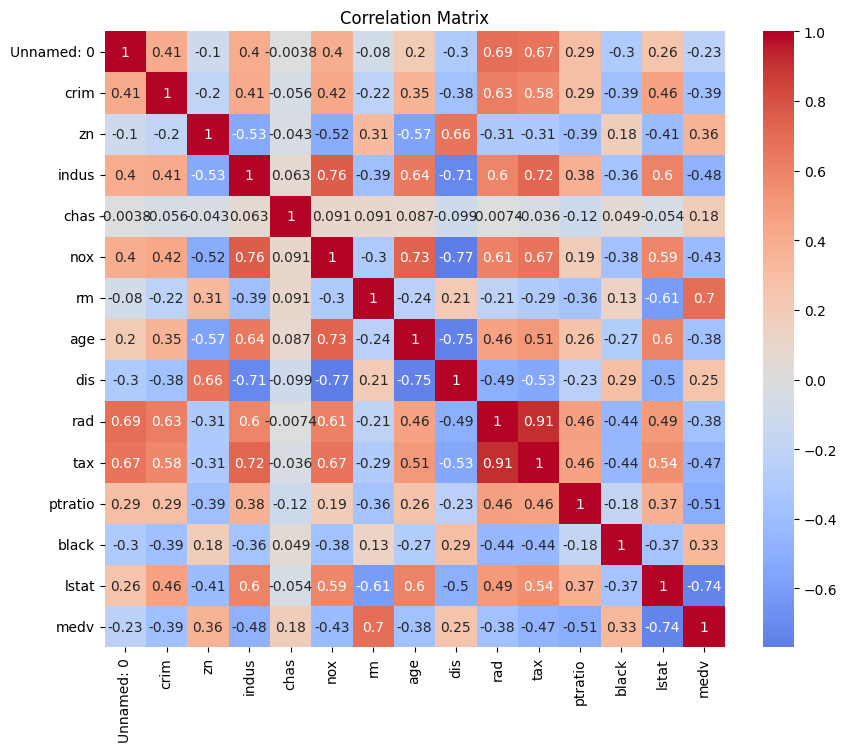

In [13]:
correlation_matrix = boston.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows the pairwise correlations between all predictors and the response variable **medv**.

theese are some of the conclusions we can draw from the graph:

* **lstat** has a strong negative correlation with **medv** (-0.74): A higher percentage of low socioeconomic households strongly reduces house values.
* **rm** has a strong positive correlation with **medv** (0.7): Larger houses with more rooms are associated with higher house values.
* **ptratio** (-0.51), **tax** (-0.47), and **nox** (-0.43) also have notable negative correlations with **medv**, indicating that poor school quality, higher taxes, and pollution reduce house values.

we have multicollinearity between the following:

* Tax ~ rad (0.91) --> high property taxes near highways
* nox ~ indus (0.76) --> pollution is strong in industrial areas
* dis ~ nox (-0.77) --> proximity to employment centers are negatively correlated with pollution levels
* age ~ nox (0.73) --> Older neighborhoods tend to have higher pollution levels



In [15]:
lstatC = [5, 10, 15]
rmC = [5, 6.5, 8]
selected_predictor_values = pd.DataFrame(
    [(lstat, rm) for lstat in lstatC for rm in rmC], columns=["lstat", "rm"]
)

# Add a constant for the intercept
selected_predictor_values_with_const = sm.add_constant(selected_predictor_values)

# Fit the regression model with lstat and rm
model_lstat_rm_medv = sm.OLS(boston['medv'], sm.add_constant(boston[['lstat', 'rm']])).fit()

# Predict `medv` and calculate prediction intervals
predictions = model_lstat_rm_medv.get_prediction(selected_predictor_values_with_const)
prediction_intervals = predictions.summary_frame(alpha=0.05)  # 95% intervals

# Display results
result_df = pd.concat([selected_predictor_values, prediction_intervals], axis=1)
print(result_df, end="\n\n")

   lstat   rm       mean   mean_se  mean_ci_lower  mean_ci_upper  \
0      5  5.0  20.903875  0.856315      19.221481      22.586269   
1      5  6.5  28.546057  0.377499      27.804387      29.287727   
2      5  8.0  36.188239  0.663860      34.883959      37.492519   
3     10  5.0  17.692084  0.693873      16.328837      19.055330   
4     10  6.5  25.334266  0.263915      24.815754      25.852777   
5     10  8.0  32.976448  0.739470      31.523618      34.429277   
6     15  5.0  14.480292  0.570322      13.359785      15.600799   
7     15  6.5  22.122474  0.304004      21.525200      22.719748   
8     15  8.0  29.764656  0.865184      28.064837      31.464475   

   obs_ci_lower  obs_ci_upper  
0      9.889729     31.918021  
1     17.635923     39.456192  
2     25.225479     47.150999  
3      6.722152     28.662016  
4     14.437027     36.231505  
5     21.995024     43.957872  
6      3.537875     25.422709  
7     11.221204     33.023745  
8     18.747835     40.781477  